In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler


In [8]:
df = pd .read_csv("BostonHousing.csv", header = 0)
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [7]:
df. isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

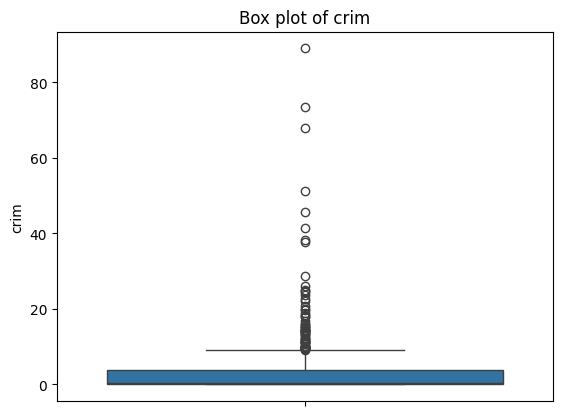

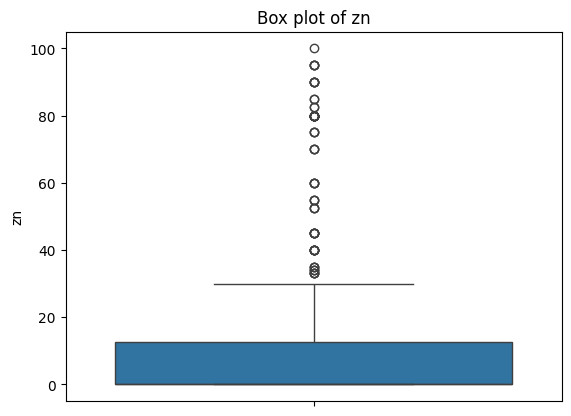

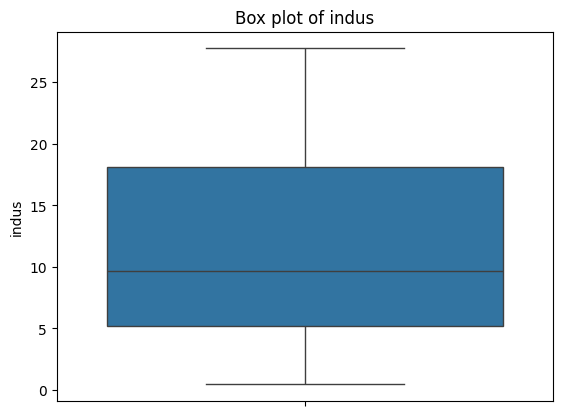

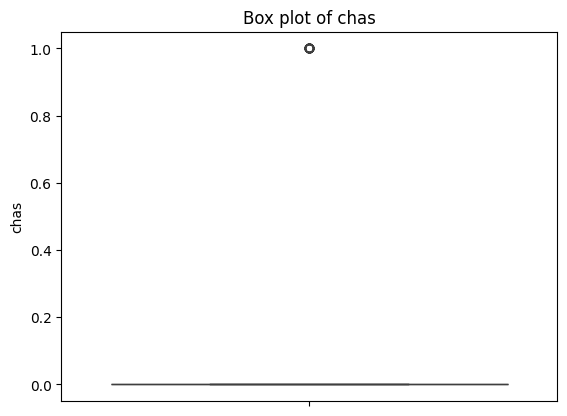

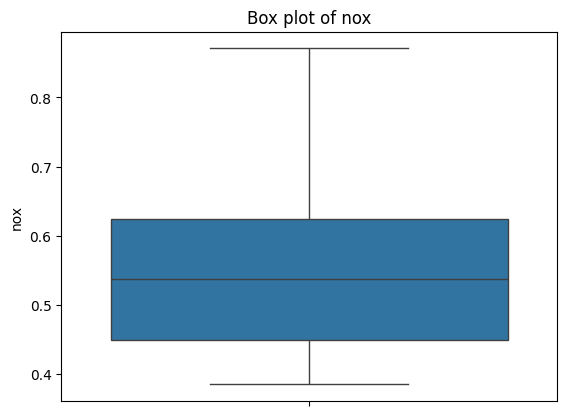

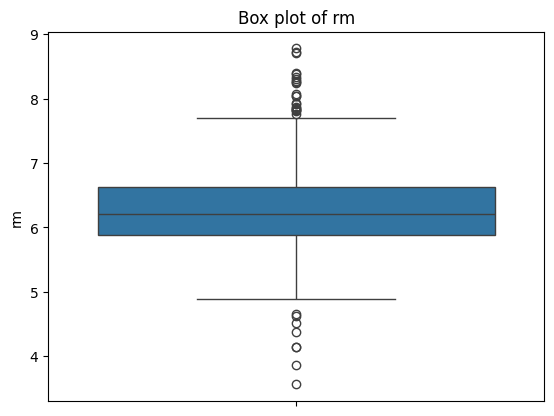

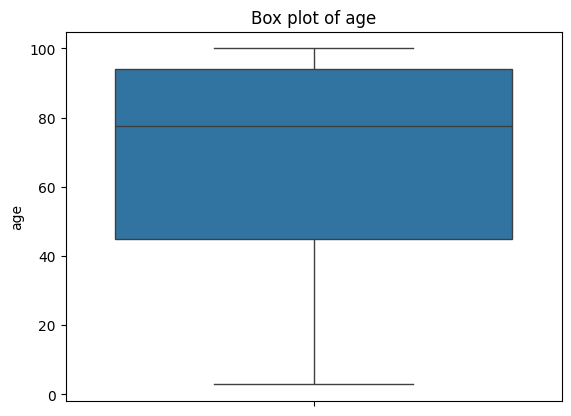

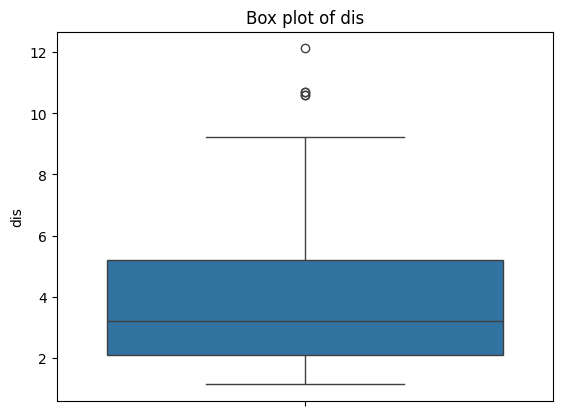

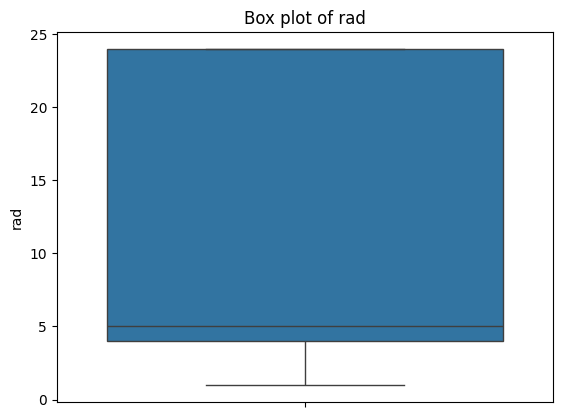

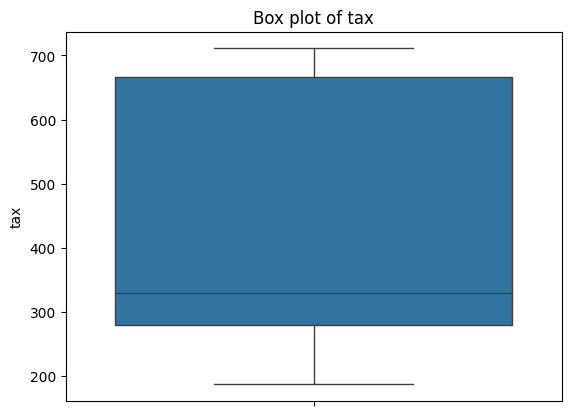

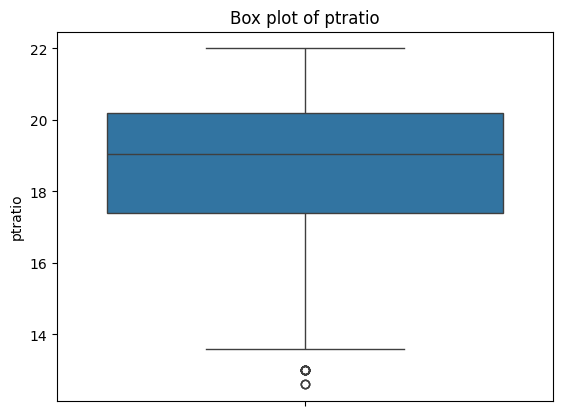

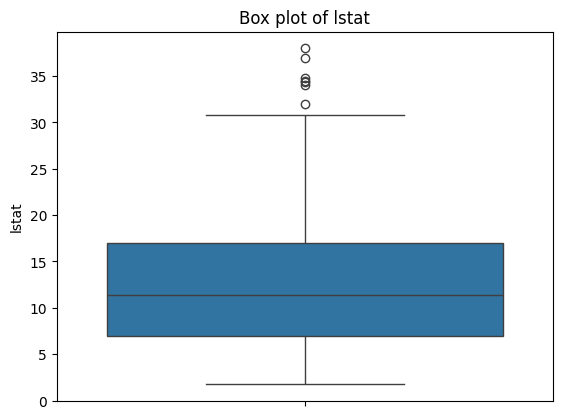

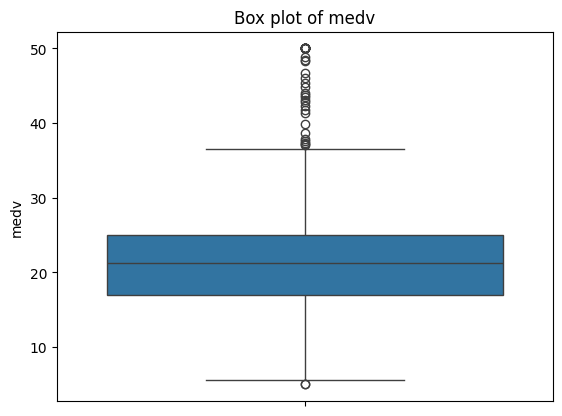

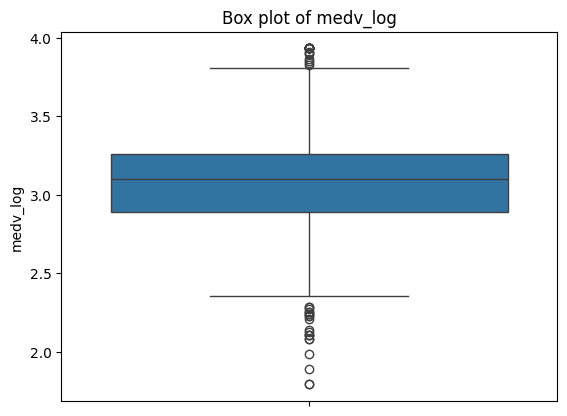

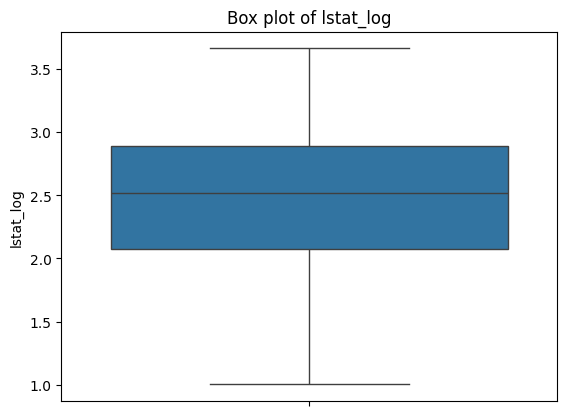

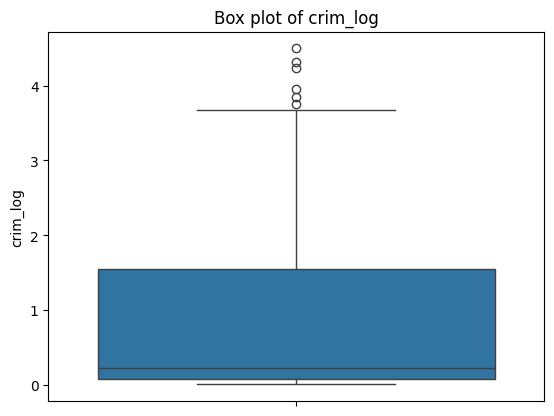

In [35]:
for feature in df.columns:
    sns.boxplot(df[feature])
    plt.title(f"Box plot of {feature}")
    plt.show()

In [9]:
df['medv_log']=np.log(df['medv']+1)
df['medv_log'].head()

0    3.218876
1    3.117950
2    3.575151
3    3.538057
4    3.616309
Name: medv_log, dtype: float64

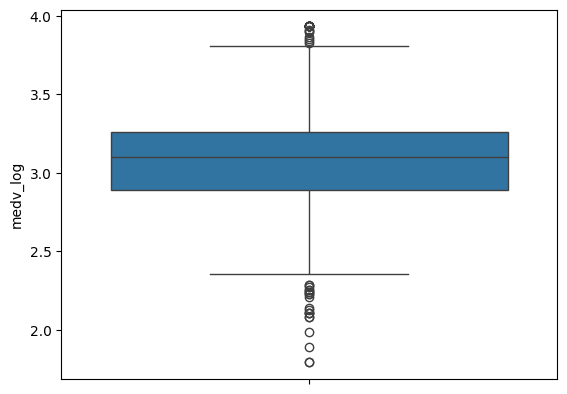

In [10]:
sns.boxplot(df['medv_log'])
plt.show()

In [11]:
df['lstat_log']= np.log(df['lstat']+1)
df['lstat_log'].head()

0    1.788421
1    2.316488
2    1.615420
3    1.371181
4    1.845300
Name: lstat_log, dtype: float64

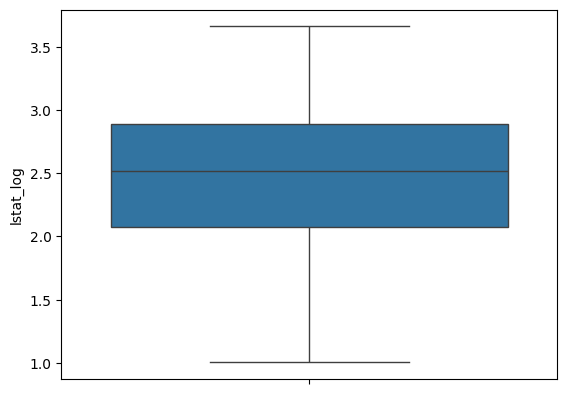

In [12]:
sns.boxplot(df['lstat_log'])
plt.show()

In [13]:
df['crim_log']=np.log(df['crim']+1)
df['crim_log'].head()

0    0.006300
1    0.026944
2    0.026924
3    0.031857
4    0.066770
Name: crim_log, dtype: float64

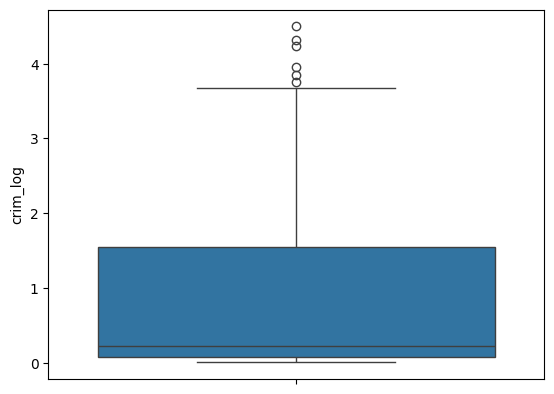

In [14]:
sns.boxplot(df['crim_log'])
plt.show()

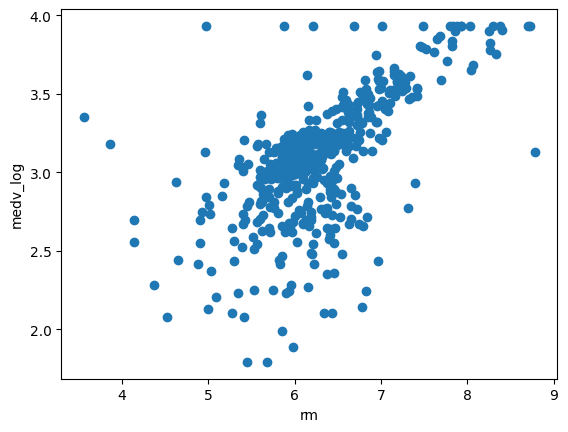

In [15]:
plt.scatter(df['rm'],df['medv_log'])
plt.xlabel('rm')
plt.ylabel('medv_log')

plt.show()

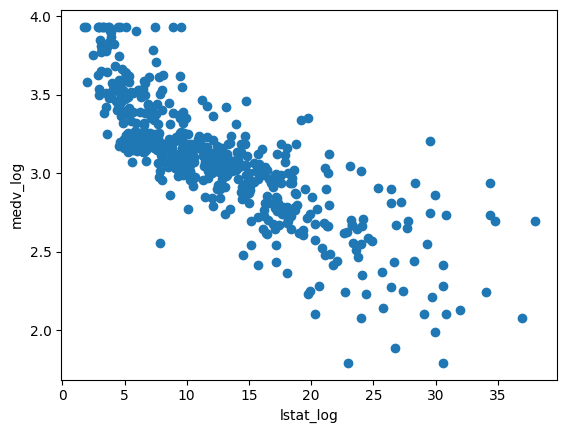

In [16]:
plt.scatter(df['lstat'],df['medv_log'])
plt.xlabel('lstat_log')
plt.ylabel('medv_log')
plt.show()

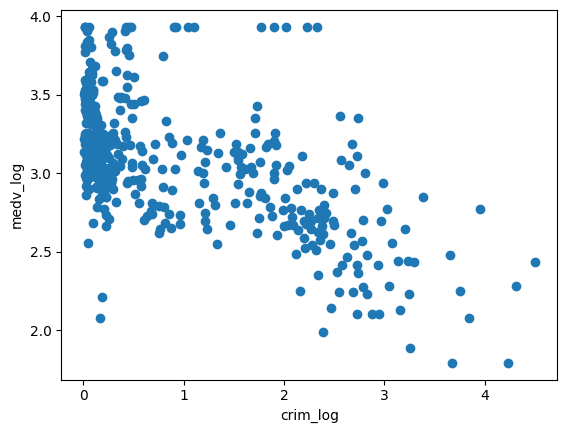

In [17]:
plt.scatter(df['crim_log'],df['medv_log'])
plt.xlabel('crim_log')
plt.ylabel('medv_log')
plt.show()


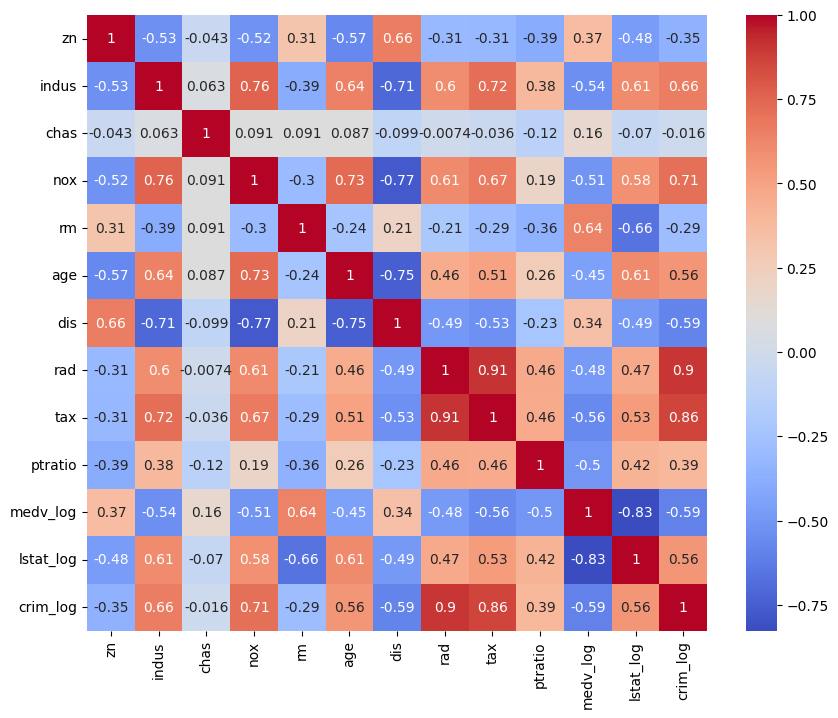

In [18]:
df_after_log= df.drop(['crim','lstat','medv'],axis=1)
corr_matrix_log= df_after_log.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix_log,annot=True,cmap='coolwarm')
plt.show()

In [19]:
# Set the correlation threshold
threshold = 0.5

# Get the correlation values with 'medv_log'
corr_with_target = corr_matrix_log['medv_log'].abs()

# Select features that have correlation > threshold with 'medv_log'
relevant_features = corr_with_target[corr_with_target > threshold].index
relevant_features=relevant_features.drop('medv_log')
print("Selected Features: ", relevant_features)

Selected Features:  Index(['indus', 'nox', 'rm', 'tax', 'ptratio', 'lstat_log', 'crim_log'], dtype='object')


In [20]:
#splitting dataset
X=df_after_log.drop('medv_log',axis=1)
Y=df_after_log['medv_log']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [21]:
#standardization
scaler=StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [22]:
model = LinearRegression()
model.fit(X_train_scaled,Y_train)
y_predict = model.predict(X_test_scaled)

In [23]:
mse_linearReg= mean_squared_error(Y_test,y_predict)
r2_linearReg= r2_score(Y_test,y_predict)
print("Mean Squared Error:",mse_linearReg)
print("R2- R Squared:",r2_linearReg)

Mean Squared Error: 0.030216770969127137
R2- R Squared: 0.7821390787642063


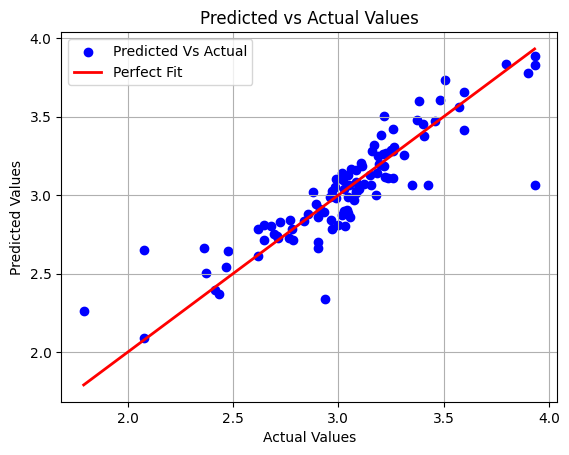

In [24]:
plt.scatter(Y_test,y_predict, color='blue', label='Predicted Vs Actual')
# Adding a line that represents a perfect prediction (y = x line)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', lw=2, label='Perfect Fit')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()

In [25]:
#------ Ridge Regression Model--------#

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled,Y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(Y_test,y_pred_ridge)
r2_ridge = r2_score(Y_test,y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R-squared: {r2_ridge}")

Ridge Regression MSE: 0.03039442893425271
Ridge Regression R-squared: 0.7808581765795659


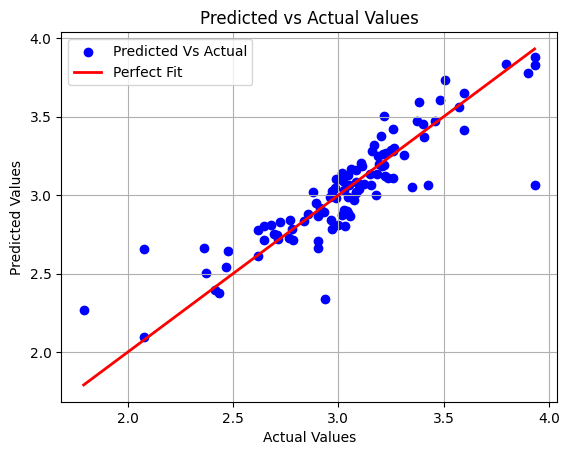

In [26]:
plt.scatter(Y_test,y_pred_ridge,color='blue', label='Predicted Vs Actual')
# Adding a line that represents a perfect prediction (y = x line)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', lw=2, label='Perfect Fit')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()

In [27]:
#--------- Lasso Regression -------------#

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled,Y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(Y_test,y_pred_lasso)
r2_lasso = r2_score(Y_test,y_pred_lasso)
print(f"Lasso Regression MSE : {mse_lasso}")
print(f"Lasso Regression R-Squared : {r2_lasso}")

Lasso Regression MSE : 0.05013065837770745
Lasso Regression R-Squared : 0.6385612669373953


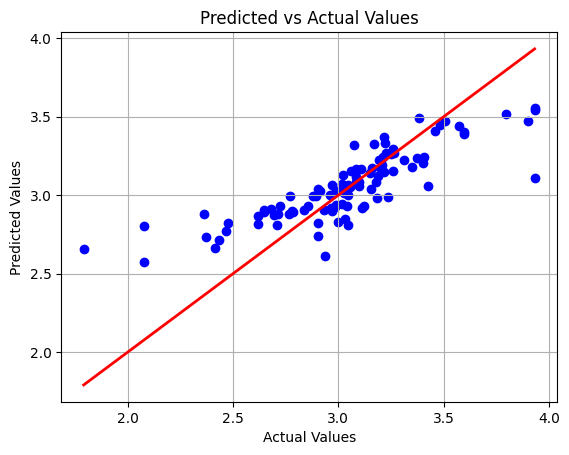

In [28]:
plt.scatter(Y_test,y_pred_lasso,color='blue', label='Predicted Vs Actual')
# Adding a line that represents a perfect prediction (y = x line)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', lw=2, label='Perfect Fit')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
#plt.legend()
plt.grid()
plt.show()


In [29]:
#--------------- DecisiontreeRegressor ------------------#
dec_tree_model = DecisionTreeRegressor(random_state=42)
dec_tree_model.fit(X_train_scaled,Y_train)
y_pred_decTree = dec_tree_model.predict(X_test_scaled)
mse_decTree = mean_squared_error(Y_test,y_pred_decTree)
r2_decTree = r2_score(Y_test,y_pred_decTree)
print(f"Decision Tree Regressor - MSE : {mse_decTree}")
print(f"Decision Tree Regressor - R-Squared : {r2_decTree}")

Decision Tree Regressor - MSE : 0.03723400855267065
Decision Tree Regressor - R-Squared : 0.7315452596548382


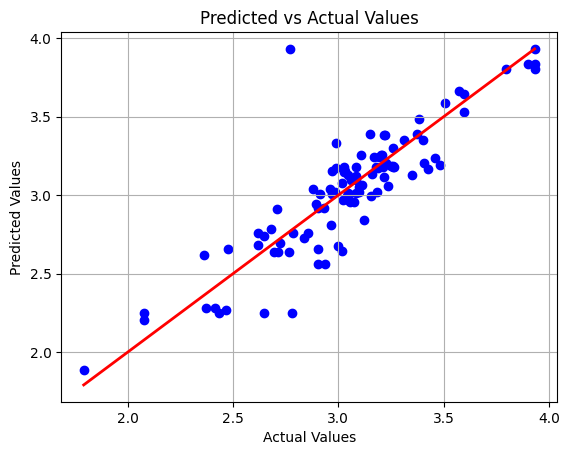

In [30]:
plt.scatter(Y_test,y_pred_decTree,color='blue', label='Predicted Vs Actual')
# Adding a line that represents a perfect prediction (y = x line)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', lw=2, label='Perfect Fit')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
#plt.legend()
plt.grid()
plt.show()

In [31]:
#---------- RandomForestRegressor -----------------#

rf_model= RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled,Y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(Y_test,y_pred_rf)
r2_rf = r2_score(Y_test,y_pred_rf)
print(f"RandomForestRegressor - MSE : {mse_rf}")
print(f"RandomForestRegressor - R-Squared :{r2_rf} ")

RandomForestRegressor - MSE : 0.022500439372159314
RandomForestRegressor - R-Squared :0.8377733194974025 


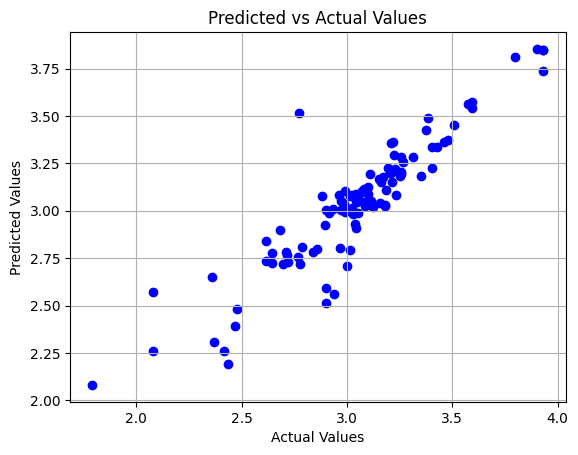

In [32]:
plt.scatter(Y_test,y_pred_rf,color='blue', label='Predicted Vs Actual')
# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
#plt.legend()
plt.grid()
plt.show()

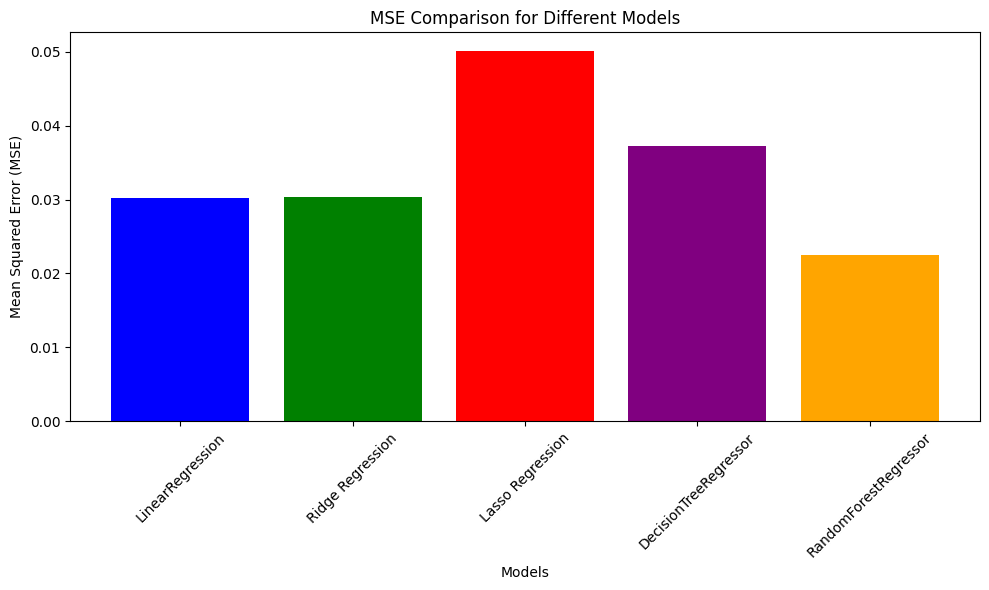

In [33]:
#---------------Comparison of MSE -----------#

mse_values = {
    'LinearRegression': mse_linearReg,
    'Ridge Regression': mse_ridge,
    'Lasso Regression': mse_lasso,
    'DecisionTreeRegressor': mse_decTree,
    'RandomForestRegressor': mse_rf
}

model_names_mse= list(mse_values.keys())
model_values_mse = list(mse_values.values())


plt.figure(figsize=(10,6))
plt.bar(model_names_mse,model_values_mse,color=['blue','green','red','purple','orange'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison for Different Models')
plt.xticks(rotation=45)  # Rotate the model names if needed
plt.tight_layout()

# Show the plot
plt.show()

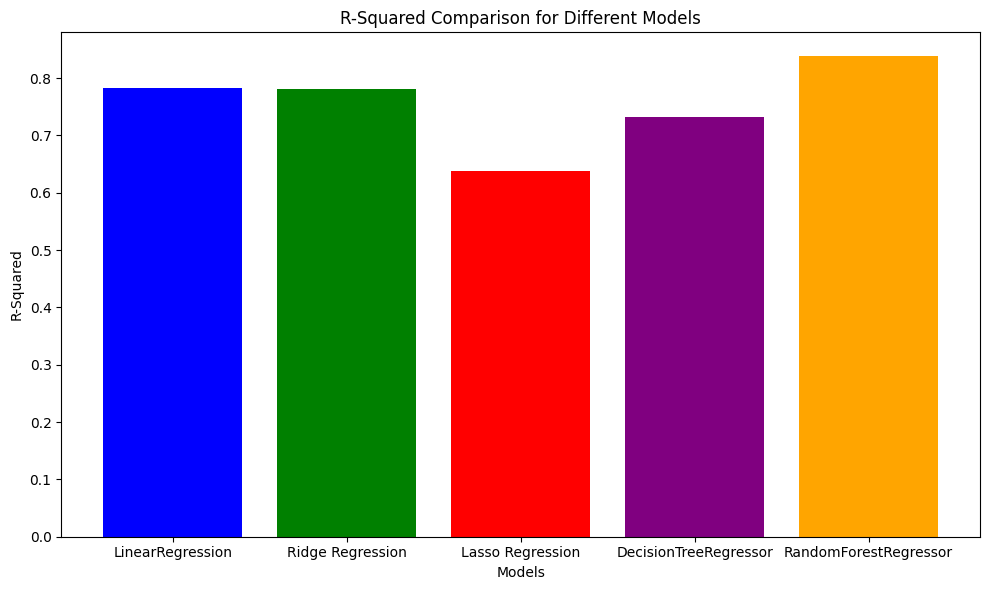

In [34]:
#---------------Comparison of R-Squared -----------#

r2_values = {
    'LinearRegression': r2_linearReg,
    'Ridge Regression': r2_ridge,
    'Lasso Regression': r2_lasso,
    'DecisionTreeRegressor': r2_decTree,
    'RandomForestRegressor': r2_rf
}

model_names_r2= list(r2_values.keys())
model_values_r2 = list(r2_values.values())


plt.figure(figsize=(10,6))
plt.bar(model_names_r2,model_values_r2,color=['blue','green','red','purple','orange'])
plt.xlabel('Models')
plt.ylabel('R-Squared')
plt.title('R-Squared Comparison for Different Models')
#plt.xticks(rotation=45)  # Rotate the model names if needed
plt.tight_layout()

# Show the plot
plt.show()